In [1]:
import os
import pandas as pd

In [2]:
a = pd.read_csv("Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv")

In [3]:
a

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


### Merge data from each month into one CSV

In [7]:
files = [file for file in os.listdir("Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")if not file.startswith('.')]
path = "Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"
al = pd.DataFrame()

for file in files:
    cf = pd.read_csv( path + "/" + file)
    al = pd.concat([ al , cf ])
    
al.to_csv("all_data_copy.csv", index=False)

### Read of CSV file

In [8]:
b = pd.read_csv("all_data_copy.csv")
b.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!
#####  The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data



### Drop rows of NAN¶

In [9]:
nan = b[b.isna().any(axis = 1)]
nan.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
c = b.dropna( how = 'all')
c.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


###  Get rid of text in order date column

In [14]:
c = c[c['Order Date'].str[0:2]=='Or']
c.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [149]:
z = b[b['Order Date'].str[0:2]!='Or']
z.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [151]:
z = z.dropna()
z.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [155]:
z['Quantity Ordered'] = pd.to_numeric(z['Quantity Ordered'] )
z['Price Each'] = pd.to_numeric(z['Price Each'])

In [156]:
z['month'] = z['Order Date'].str[0:2]
z['month'] = z['month'].astype('int32')
z.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [168]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]


z["city"] = z["Purchase Address"].apply(lambda x: get_city(x))
z["state"] = z["Purchase Address"].apply(lambda x: get_state(x))
z.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,state,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99


In [169]:
z['Sales'] = z['Quantity Ordered'].astype('int') * z['Price Each'].astype('float')

In [170]:
z

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,state,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,CA,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,CA,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,CA,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,CA,379.99


In [172]:
q = z.dropna()
q

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,state,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,CA,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,CA,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,CA,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,CA,379.99


###  we made four  new column month , city , state , sales 

#### Data Exploration!
#### Question 1: What was the best month for sales? How much was earned that month?
#### Question 2: What city and state sold the most product?

In [173]:
df = q.groupby(['month']).sum()
df

,Quantity Ordered,Price Each,Sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


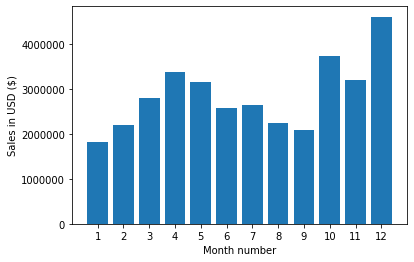

In [174]:
import matplotlib.pyplot as plt

months = range(1,13)


plt.bar(months, df.groupby(['month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



In [175]:
city =q.groupby(['city']).sum()
city


,Quantity Ordered,Price Each,month,Sales
city,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


# Wrong representation of data crosscheck

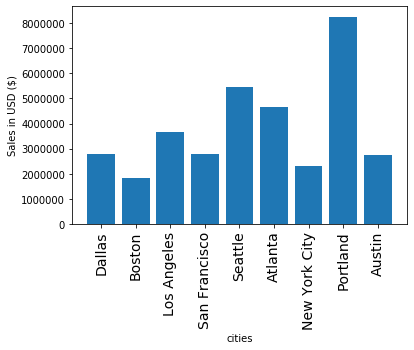

In [176]:
import matplotlib.pyplot as plt

c = q["city"].unique()


plt.bar(c , city['Sales'])
plt.xticks(c , rotation = 'vertical', size = 14)
plt.ylabel('Sales in USD ($)')
plt.xlabel('cities')
plt.show()

# correct representation of data crosscheck


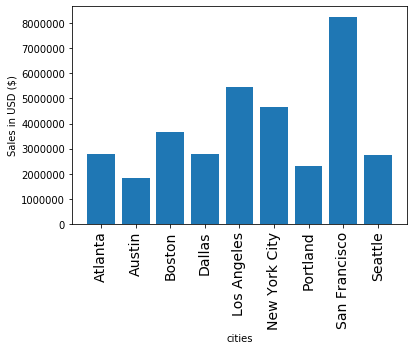

In [177]:
import matplotlib.pyplot as plt

c = [city for city , df in q.groupby('city')]


plt.bar(c , city['Sales'])
plt.xticks(c , rotation = 'vertical', size = 14)
plt.ylabel('Sales in USD ($)')
plt.xlabel('cities')
plt.show()

## doing same for state

In [71]:
state =q.groupby(['state']).sum()
state

,Quantity Ordered,Price Each,month,Sales
state,,,,
CA,83528,1.363290e+07,523845,1.371477e+07
GA,16602,2.779908e+06,104794,2.795499e+06
MA,22528,3.637410e+06,141112,3.661642e+06
ME,2750,4.471893e+05,17144,4.497583e+05
NY,27932,4.635371e+06,175741,4.664317e+06
OR,11303,1.860558e+06,70621,1.870732e+06
TX,27883,4.562501e+06,174449,4.587557e+06
WA,16553,2.733296e+06,104941,2.747755e+06


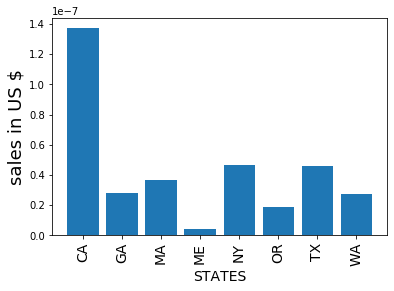

In [178]:


s = [ states for states , df in q.groupby('state')]
plt.bar( s , state['Sales']/10**7)
plt.xticks( s , rotation = 'vertical' , size = 14)
plt.ylabel("sales in US $" , size = 18)
plt.xlabel("STATES",size = 14)
plt.show()

In [179]:
state['Sales'] = state['Sales']/10**7

In [180]:
state

,Quantity Ordered,Price Each,month,Sales
state,,,,
CA,83528,1.363290e+07,523845,1.371477e-07
GA,16602,2.779908e+06,104794,2.795499e-08
MA,22528,3.637410e+06,141112,3.661642e-08
ME,2750,4.471893e+05,17144,4.497583e-09
NY,27932,4.635371e+06,175741,4.664317e-08
OR,11303,1.860558e+06,70621,1.870732e-08
TX,27883,4.562501e+06,174449,4.587557e-08
WA,16553,2.733296e+06,104941,2.747755e-08


## Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [184]:
q

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,state,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,CA,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,CA,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,CA,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,CA,379.99


In [186]:
q["Order Date"] = pd.to_datetime(q["Order Date"] )

In [191]:
q['Hour'] = pd.to_datetime(q['Order Date']).dt.hour
q['Minute'] = pd.to_datetime(q['Order Date']).dt.minute
q["Count"] = 1

In [192]:
q.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,state,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,99.99,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,9,27,1


In [193]:
q["Hour"]

0          8
2         22
3         14
4         14
5          9
          ..
186845    20
186846    16
186847     7
186848    17
186849     0
Name: Hour, Length: 185950, dtype: int64

In [197]:
k = q.groupby(["Hour"]).count()
k

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,state,Sales,Minute,Count
Hour,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


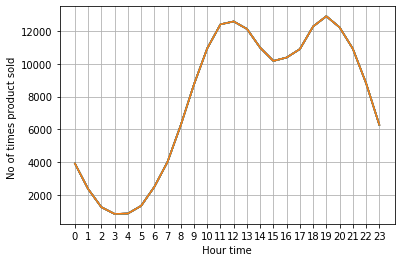

In [207]:
hours = [hour for hour , df in q.groupby("Hour")]
plt.plot( hours , q.groupby(["Hour"]).count() )
plt.xticks(hours, size = 10)
plt.xlabel(" Hour time ")
plt.ylabel("No of times product sold ") 
plt.grid()
plt.show()



##  ** FOLLOWING IS MOST IMPORTANT STEP PLEASE DO THIS FREQUENTLY WHILE SOLVING FILES AT ONE TIME SO THAT YOU DONT MISS DATA IN BETWEEEN WITH SAME NAME KEEP YOUR UPDATED DATA SAVED WITH DIFFERENT NAME SO THAT YOU CAN RECOVER ANY TIME FOLLOWING IS THE STEP FOR SAME **

In [206]:
w = q.dropna()   # SEE HERE z==w==q all three are same df with different names
w

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,state,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,99.99,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,9,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,CA,8.97,20,56,1
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,CA,700.00,16,0,1
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco,CA,700.00,7,39,1
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco,CA,379.99,17,30,1


### Question 4: What products are most often sold together?

In [215]:
nf = q[q["Order ID"].duplicated(keep = False )]
nf["Grouped"] = nf.groupby("Order ID")["Product"].transform( lambda x : ",".join(x))

nf.head(20)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,state,Sales,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00,14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00,19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,CA,11.95,19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston,MA,99.99,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston,MA,99.99,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,San Francisco,CA,5.98,17,0,1,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,San Francisco,CA,600.00,17,0,1,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,New York City,NY,14.95,11,7,1,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,New York City,NY,11.95,11,7,1,"Lightning Charging Cable,USB-C Charging Cable"


In [217]:
df2 = nf[['Order ID','Grouped']].drop_duplicates()
df2

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [218]:
from itertools import combinations
from collections import Counter

In [219]:
count = Counter()

for row in df2["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list , 2)))
    
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [220]:
count = Counter()

for row in df2["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list , 2)))
    
for i in count:
    print(i)

('Google Phone', 'Wired Headphones')
('Google Phone', 'USB-C Charging Cable')
('Bose SoundSport Headphones', 'Bose SoundSport Headphones')
('AAA Batteries (4-pack)', 'Google Phone')
('Lightning Charging Cable', 'USB-C Charging Cable')
('Apple Airpods Headphones', 'ThinkPad Laptop')
('Bose SoundSport Headphones', 'AAA Batteries (4-pack)')
('34in Ultrawide Monitor', 'Google Phone')
('iPhone', 'Lightning Charging Cable')
('Google Phone', 'Bose SoundSport Headphones')
('Bose SoundSport Headphones', 'Wired Headphones')
('AAA Batteries (4-pack)', '27in FHD Monitor')
('USB-C Charging Cable', 'AAA Batteries (4-pack)')
('iPhone', 'Wired Headphones')
('iPhone', '27in 4K Gaming Monitor')
('ThinkPad Laptop', 'AAA Batteries (4-pack)')
('iPhone', 'Apple Airpods Headphones')
('iPhone', 'AAA Batteries (4-pack)')
('Apple Airpods Headphones', 'AAA Batteries (4-pack)')
('Wired Headphones', 'Apple Airpods Headphones')
('Macbook Pro Laptop', 'ThinkPad Laptop')
('AA Batteries (4-pack)', 'Flatscreen TV')
('V

In [227]:
count = Counter()

for row in df2["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list , 3)))
    
for i in count.most_common(10):
    print(i)

(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 87)
(('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 62)
(('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 47)
(('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 35)
(('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'), 33)
(('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'), 27)
(('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 24)
(('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'), 16)
(('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)
(('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'), 5)


In [228]:
count = Counter()

for row in df2["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list , 2)))
    
for i,j in count:
    print(i,j)

Google Phone Wired Headphones
Google Phone USB-C Charging Cable
Bose SoundSport Headphones Bose SoundSport Headphones
AAA Batteries (4-pack) Google Phone
Lightning Charging Cable USB-C Charging Cable
Apple Airpods Headphones ThinkPad Laptop
Bose SoundSport Headphones AAA Batteries (4-pack)
34in Ultrawide Monitor Google Phone
iPhone Lightning Charging Cable
Google Phone Bose SoundSport Headphones
Bose SoundSport Headphones Wired Headphones
AAA Batteries (4-pack) 27in FHD Monitor
USB-C Charging Cable AAA Batteries (4-pack)
iPhone Wired Headphones
iPhone 27in 4K Gaming Monitor
ThinkPad Laptop AAA Batteries (4-pack)
iPhone Apple Airpods Headphones
iPhone AAA Batteries (4-pack)
Apple Airpods Headphones AAA Batteries (4-pack)
Wired Headphones Apple Airpods Headphones
Macbook Pro Laptop ThinkPad Laptop
AA Batteries (4-pack) Flatscreen TV
Vareebadd Phone USB-C Charging Cable
USB-C Charging Cable Lightning Charging Cable
Google Phone AA Batteries (4-pack)
AA Batteries (4-pack) AAA Batteries (4-

In [225]:
count = Counter()

for row in df2["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list , 3)))
    
for i,j in count.most_common(10):
    print(i,j)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### What product sold the most? Why do you think it sold the most?¶

In [253]:
q.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,state,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,99.99,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,9,27,1


In [254]:
product_group = q.groupby('Product').sum()
product_group

,Quantity Ordered,Price Each,month,Sales,Hour,Minute,Count
Product,,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252,4101
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331,6230
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948,7507
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480,6181
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039,20577
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113,20641
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570,15549
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603,13325
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789,4800


In [263]:
product_group.columns[[0,1]]

Index(['Quantity Ordered', 'Price Each'], dtype='object')

### this is a index now lets convert index into column 

In [272]:
product_group.index  

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

In [273]:
product_group["Products"] = product_group.index

In [274]:
product_group

,Quantity Ordered,Price Each,month,Sales,Hour,Minute,Count,Products
Product,,,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252,4101,20in Monitor
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331,6230,27in 4K Gaming Monitor
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948,7507,27in FHD Monitor
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480,6181,34in Ultrawide Monitor
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039,20577,AA Batteries (4-pack)
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113,20641,AAA Batteries (4-pack)
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570,15549,Apple Airpods Headphones
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603,13325,Bose SoundSport Headphones
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789,4800,Flatscreen TV


## how to drop index 

In [280]:
ff = product_group[["Products","Quantity Ordered"]]
ff.reset_index(drop=True, inplace=True)
ff

,Products,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


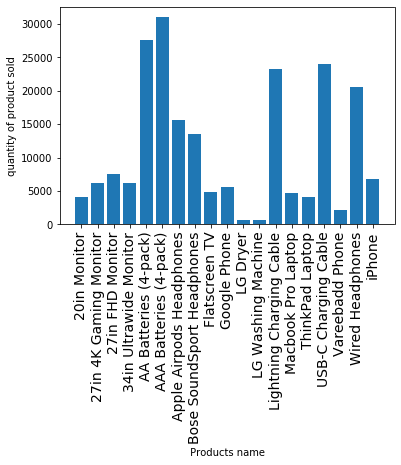

In [293]:




import matplotlib.pyplot as plt

plt.bar( ff['Products'] , ff["Quantity Ordered"])
plt.xticks( ff['Products'] , rotation ='vertical', size = 14 )
plt.plot(figsize=(15,10))
plt.xlabel(" Products name ")
plt.ylabel(" quantity of product sold ")
plt.show()


In [298]:
product_group["prices"] = product_group['Sales'] / product_group["Quantity Ordered"]


In [299]:
product_group

,Quantity Ordered,Price Each,month,Sales,Hour,Minute,Count,Products,prices
Product,,,,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252,4101,20in Monitor,109.99
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331,6230,27in 4K Gaming Monitor,389.99
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948,7507,27in FHD Monitor,149.99
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480,6181,34in Ultrawide Monitor,379.99
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039,20577,AA Batteries (4-pack),3.84
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113,20641,AAA Batteries (4-pack),2.99
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570,15549,Apple Airpods Headphones,150.00
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603,13325,Bose SoundSport Headphones,99.99
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789,4800,Flatscreen TV,300.00


In [301]:
pf = product_group[["Products","Quantity Ordered","prices"]]
pf.reset_index(drop=True, inplace=True)        # dropping index
pf

,Products,Quantity Ordered,prices
0,20in Monitor,4129,109.99
1,27in 4K Gaming Monitor,6244,389.99
2,27in FHD Monitor,7550,149.99
3,34in Ultrawide Monitor,6199,379.99
4,AA Batteries (4-pack),27635,3.84
5,AAA Batteries (4-pack),31017,2.99
6,Apple Airpods Headphones,15661,150.00
7,Bose SoundSport Headphones,13457,99.99
8,Flatscreen TV,4819,300.00
9,Google Phone,5532,600.00


Text(0, 0.5, ' price ')

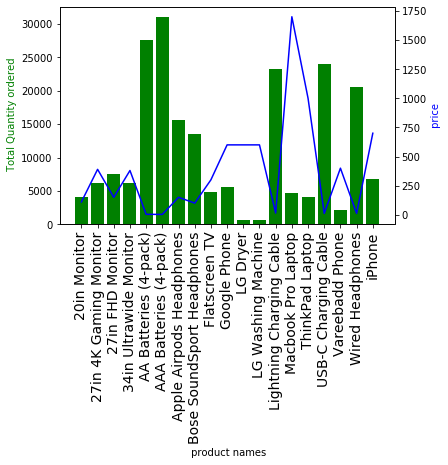

In [311]:
fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax1.bar(pf["Products"] ,pf["Quantity Ordered"] , color='g' )
ax2.plot(pf["Products"] ,pf["prices"] ,'b-')

ax1.set_xticklabels(pf["Products"] , rotation ='vertical', size = 14 )
ax1.set_xlabel(" product names")
ax1.set_ylabel(" Total Quantity ordered" , color = "g")
ax2.set_ylabel(" price " , color = 'b')